# Inspect multipe built-in options for (2,2) starting frequency

In [1]:
from nrutils import scsearch,gwylm
from matplotlib.pyplot import *
from positive import *
from numpy import *

(positive)>> Applying custom matplotlib settings.


In [2]:
a = scsearch(keyword='q1a04t30_dPm2_T_96_552',verbose=True)

(scsearch)>> Found keyword (=q1a04t30_dPm2_T_96_552) keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
## Found 1 possibly degenerate simulations:
[0001][hogshead] q1: 2chi0.40-p-q1.00	(q1a04t30_dPm2_T_96_552)



In [3]:
y = gwylm(a[0],lm=(2,2),verbose=True,clean=True)

(gwylm)>> Found clean (=True) keyword.
(gwylm)>> Found dt (=0.15) keyword.
(gwylm)>> Found lm (=(2, 2)) keyword.
(gwylm)>> Found scentry_obj (=<nrutils.core.nrsc.scentry instance at 0x11cddd2d8>) keyword.
(gwylm)>> Found verbose (=True) keyword.
(__init__)>> Using default M_RELATIVE_SIGN_CONVENTION of 1
(gwylm)>> The (extraction_parameter,level) is (5,7), which differs from the config values of (5,5). You have either manually input the non-config values, or the handler has set them by looking at the contents of the simulation directory. 
(__make_lmlist__)>> The following spherical multipoles will be loaded:[(2, 2)]
(load)>> Using the default extraction_parameter of 5
(load)>> Using the default level of 7
(load)>> Loading: psi3col.r5.l7.l2.m2.gz
(load)>> Imposing a default padding of 3 to the data.
(pad_wfarr)>> The shape was (13824, 3). Now the shape is (13827, 3).
(gwylm)>> Storing w22 from a PN estimate[see pnw0 in basics.py, and/or arxiv:1310.1528v4]. This will be the frequency para

In [11]:
# From the waveform
print 'From the waveform:\t\t\t',y.wstart
# From PN
print 'From PN:\t\t\t\t',y.wstart_pn
# From the raw metadata (e.g. bbh file)
print 'From the raw metadata (e.g. bbh file):\t',y.raw_metadata.freq_start_22

From the waveform:			0.0647629075907
From PN:				0.042351995679
From the raw metadata (e.g. bbh file):	0.0335423


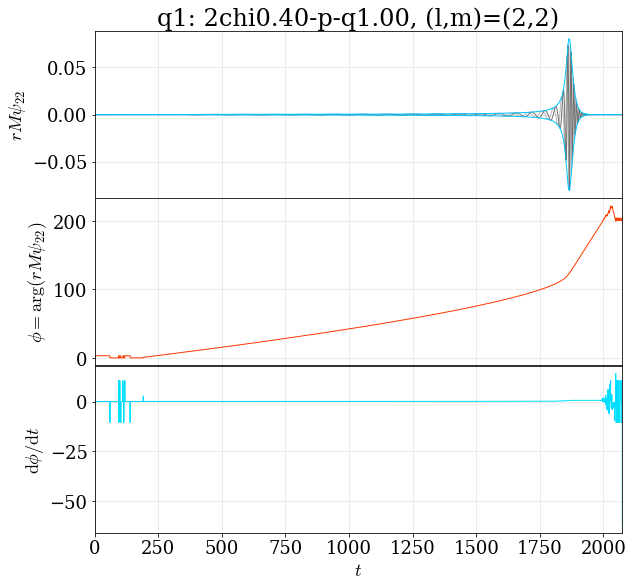

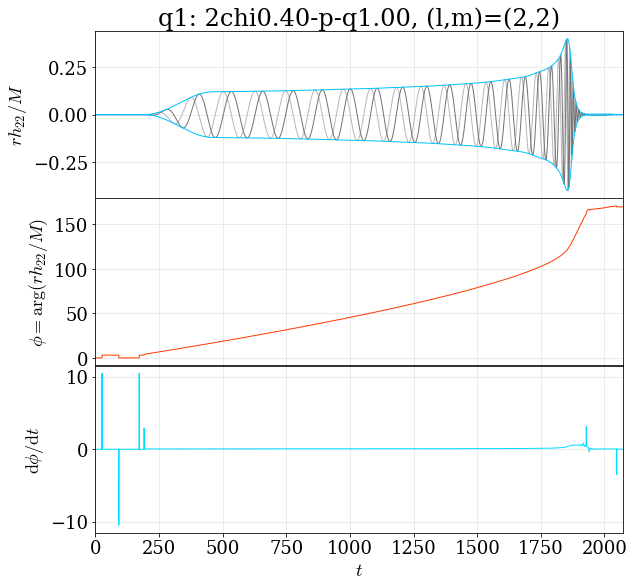

In [5]:
y.plot()

In [6]:
print y.preinspiral.left_dphi
print y.preinspiral.right_dphi
print y.preinspiral.center_dphi

0.0647629075907
0.0491357066379
0.0476345177548


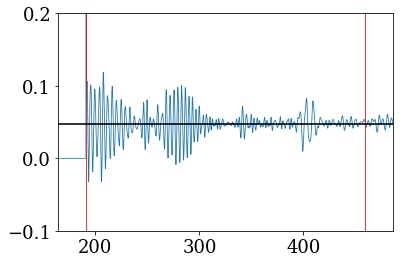

In [15]:
plot( y.t, y[2,2]['psi4'].dphi )
# xlim( y.t[y.preinspiral.window_state] )
# ylim( y[2,2]['psi4'].dphi[y.preinspiral.window_state] )
t1,t2 = y.t[y.preinspiral.window_state]
axvline(t1,color='r')
axvline(t2,color='r')
xlim( lim([t1,t2],dilate=0.1) )
ylim([-0.1,0.2])
#
# axhline( y.preinspiral.left_dphi, color='k' )
axhline( y.preinspiral.center_dphi, color='k' )
# axhline( y.preinspiral.right_dphi, color='k' )
# axhline( mean(y[2,2]['psi4'].dphi[y.preinspiral.left_index:y.preinspiral.right_index]), color='k', ls='--' )
# mean(y[2,2]['psi4'].dphi[y.preinspiral.left_index:y.preinspiral.right_index])